In [11]:
# LIBRAIRIES IMPORT
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# DATA IMPORT
uber = pd.read_csv('../data/uber-raw-data-aug14.csv')
uber.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [3]:
# PROFILE REPORT
profile = ProfileReport(uber, title="Uber Trips Aug 2014 Profiling Report")
profile.to_file("uber-raw-data-aug14_profiling.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 627.42it/s]


In [3]:
# No missing values, no correlation, no duplicates
# Date/Time to be changed to datetime format
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'])

In [14]:
uber.tail()

,Date/Time,Lat,Lon,Base
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764


In [4]:
# TIME DISTRIBUTION
uber['Hour'] = uber['Date/Time'].dt.hour
uber['DayOfWeek'] = uber['Date/Time'].dt.dayofweek

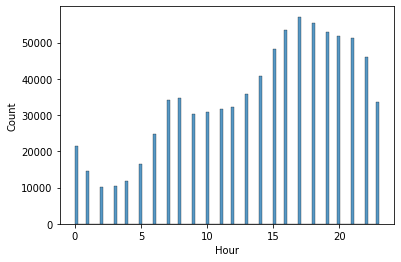

In [9]:
sns.histplot(data = uber, x = 'Hour')
plt.show()

In [24]:
uber['Period'] = np.nan

# Low-demand hours (night) 23-6
uber['Period'] = np.where(uber['Hour']<=6,0, uber['Period'])
uber['Period'] = np.where(uber['Hour']>=23,0, uber['Period'])

# Medium-demand hours (morning / begin-afternoon) 7-14
uber['Period'] = np.where((uber['Hour']>=7) & (uber['Hour']<=14),1,uber['Period'])

# High-demand hours (end-afternoon / evening) 15-22
uber['Period'] = np.where((uber['Hour']>=15) & (uber['Hour']<=22),2,uber['Period'])

uber['Period'] = uber['Period'].astype(int)

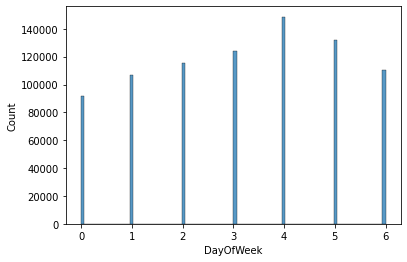

In [10]:
sns.histplot(data = uber, x = 'DayOfWeek')
plt.show()

In [22]:
uber['DayType'] = np.nan

# WeekDay except Friday
uber['DayType'] = np.where(uber['DayOfWeek']<=3,0, uber['DayType'])

# Friday
uber['DayType'] = np.where(uber['DayOfWeek']==4,1,uber['DayType'])

# Week-end
uber['DayType'] = np.where(uber['DayOfWeek']>=5,0, uber['DayType'])

uber['DayType'] = uber['DayType'].astype(int)

In [25]:
uber.head()

,Date/Time,Lat,Lon,Base,Hour,DayOfWeek,Period,DayType
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,0,4,0,1
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,0,4,0,1
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,0,4,0,1
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,0,4,0,1
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,0,4,0,1


In [26]:
# SAVE AS CSV
uber.to_csv('../data/Uber.csv')